# Data Mining Assignment 2_DT_NB

## Student Details

Student Name and ID of the member submitting the assignment: 
Name: jayesh parsnani ID: 1001964955
Student Name and ID of the remaining members: 
Name: Gaurav Tanega ID: 1001955801
Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

In [2]:
import pandas as pd
import numpy as np
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]

3) Print the class labels. [1 points]

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]



In [3]:
# 1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]
df = pd.read_csv("/Users/jayeshparsnani/Desktop/Parsnani_1001964955_Taneja_1001955801_PA2/Gender_Classifier.csv",encoding='latin1')



In [4]:
# 2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]
first_seven_records = df.head(7)
print("first seven records")
print(first_seven_records)


first seven records
    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3  10/26/2015 23:24   
1  815719227    False   finalized                   3  10/26/2015 23:30   
2  815719228    False   finalized                   3  10/26/2015 23:33   
3  815719229    False   finalized                   3  10/26/2015 23:10   
4  815719230    False   finalized                   3   10/27/2015 1:15   
5  815719231    False   finalized                   3   10/27/2015 1:47   
6  815719232    False   finalized                   3   10/27/2015 1:57   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes          

In [5]:
print("Last seven records")
Last_seven_records = df.tail(7)
print(Last_seven_records)

Last seven records
        _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
20043  815756700     True      golden                 240               NaN   
20044  815756767     True      golden                 227               NaN   
20045  815757572     True      golden                 259               NaN   
20046  815757681     True      golden                 248               NaN   
20047  815757830     True      golden                 264               NaN   
20048  815757921     True      golden                 250               NaN   
20049  815757985     True      golden                 249               NaN   

       gender  gender:confidence profile_yn  profile_yn:confidence  \
20043    male             1.0000        yes                    1.0   
20044  female             1.0000        yes                    1.0   
20045  female             1.0000        yes                    1.0   
20046    male             1.0000        yes                    1.0  

In [6]:
# 3) Print the class labels. [1 points]
print(" The class Label is: \n")
Class_label = df['gender']
Class_label.value_counts()

 The class Label is: 



female     6700
male       6194
brand      5942
unknown    1117
Other        97
Name: gender, dtype: int64

In [8]:
print("Preprocessing of the data. Converting whole data in number format.")
# Run this 2-3times because it take time to process.
# reference : https://www.kaggle.com/getting-started/61148
d= list(df.select_dtypes(include=['category','object']))
label_encoder = preprocessing.LabelEncoder()
for i in d:
	df[i] = label_encoder.fit_transform(df[i])
df= df.astype(str)
dataset = df.values.tolist()
print(df)

Preprocessing of the data. Converting whole data in number format.
      _unit_id _golden _unit_state _trusted_judgments _last_judgment_at  \
0            0       0           0                 31                 4   
1            1       0           0                 31                10   
2            2       0           0                 31                14   
3            3       0           0                 31               270   
4            4       0           0                 31               127   
...        ...     ...         ...                ...               ...   
20045    20045       1           1                 22               205   
20046    20046       1           1                 13               205   
20047    20047       1           1                 26               205   
20048    20048       1           1                 15               205   
20049    20049       1           1                 14               205   

      gender gender:confidence p

In [9]:
# 4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]
train_ratio = 0.60
test_ratio = 0.20
validation_ratio = 0.20

X = df.drop(['_unit_id','gender','_unit_state'], axis=1)
y = df['gender']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio,random_state=2022)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio),random_state=2022)

# print("X train is",X_train.shape)
# print("X test is ",X_test.shape)
# print(X_valid.shape)
print("Number of rows in whole dataset is",df.shape[0])
print("Number of rows in training dataset is:",X_train.shape[0])
print("Number of rows in validating dataset is:",X_valid.shape[0])
print("Number of rows in testing dataset is:",X_test.shape[0])


Number of rows in whole dataset is 20050
Number of rows in training dataset is: 12030
Number of rows in validating dataset is: 4010
Number of rows in testing dataset is: 4010


### DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split. [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.[4 points]

4) Print the decision tree visualization for 3 different depths using given libraries.  [3 points]

The confusion matrix using gini is
                Predicted Male  Predicted Female  Predicted brand  \
Actual Male                  9                 4                5   
Actual Female                0               675               92   
Actual brand                 0               205              640   
Actual Unknown               0               215              343   
Actual Other                 0                92               15   

                Predicted Unknown  Predicted Other  
Actual Male                     2                7  
Actual Female                 342               26  
Actual brand                  559                8  
Actual Unknown                636               18  
Actual Other                   82               35  


The classification report for the given dataset using gini as a measure is: 
 
              precision    recall  f1-score   support

           0     1.0000    0.3333    0.5000        27
           1     0.5668    0.5947    0.580

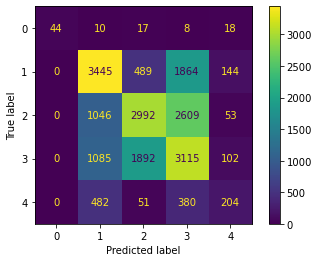

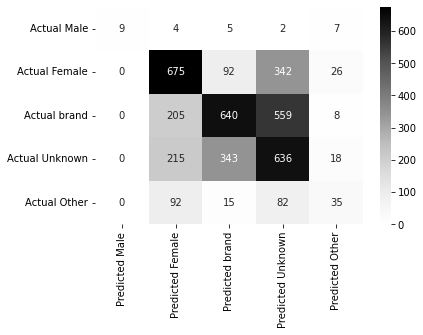

In [10]:
# 1) Use gini and entropy to measure the quality of a split. [2 points]
# 1- a)Using gini to measure the quality of a split
module_data = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 4, max_leaf_nodes = 25)

# Train Module using Train Set
model = module_data.fit(X_train, y_train)

# Predict Class label using Test Set
Y_predicted_classLabel = model.predict(X_test)


# 3- Calculate and print the confusion matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# we've build confusion matrix of 5 variables.
print('The confusion matrix using gini is')
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_test, Y_predicted_classLabel),
  columns=['Predicted Male', 'Predicted Female','Predicted brand','Predicted Unknown','Predicted Other'],
  index=['Actual Male', 'Actual Female','Actual brand','Actual Unknown','Actual Other']
)
print(ConfusionMatrix)
print("\n")
#  the classification Report (includes: precision, recall, f1-score, and support.
print('The classification report for the given dataset using gini as a measure is: \n ')
print(classification_report(y_test, Y_predicted_classLabel, digits=4))

plot_confusion_matrix(model, X, y)
plt.show()

sns.heatmap(ConfusionMatrix, annot=True, cmap="Greys", fmt="d")
plt.show()

DecisionTree for depth = 4.


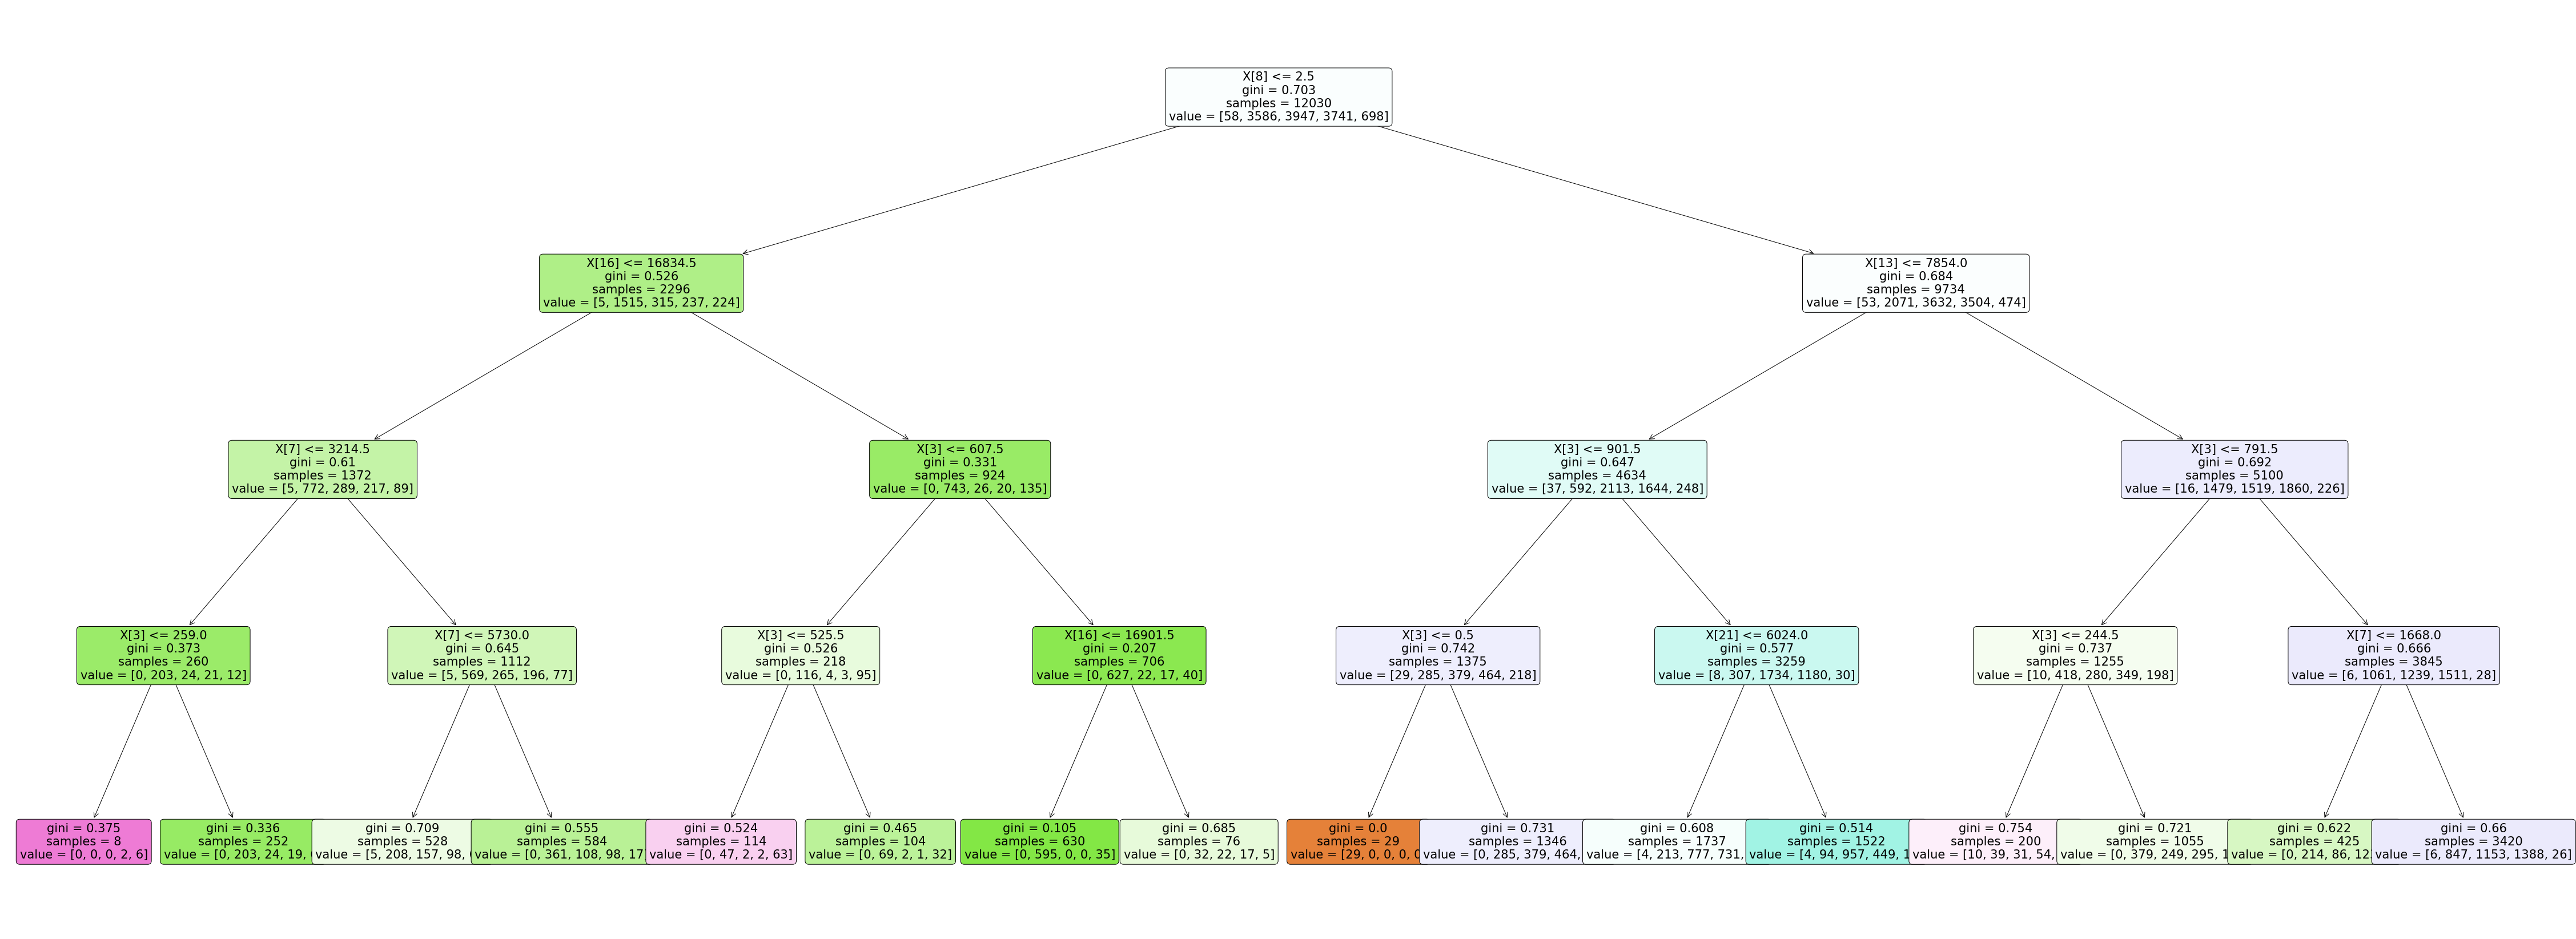

In [11]:
# 4-  Print the decision tree.

print("DecisionTree for depth = 4.")
text_representation = tree.export_text(module_data)
text_representation
fig = plt.figure(figsize=(80,30))
_ = tree.plot_tree(module_data, filled=True, fontsize=21, rounded=True)

DecisionTree for depth = 5 .


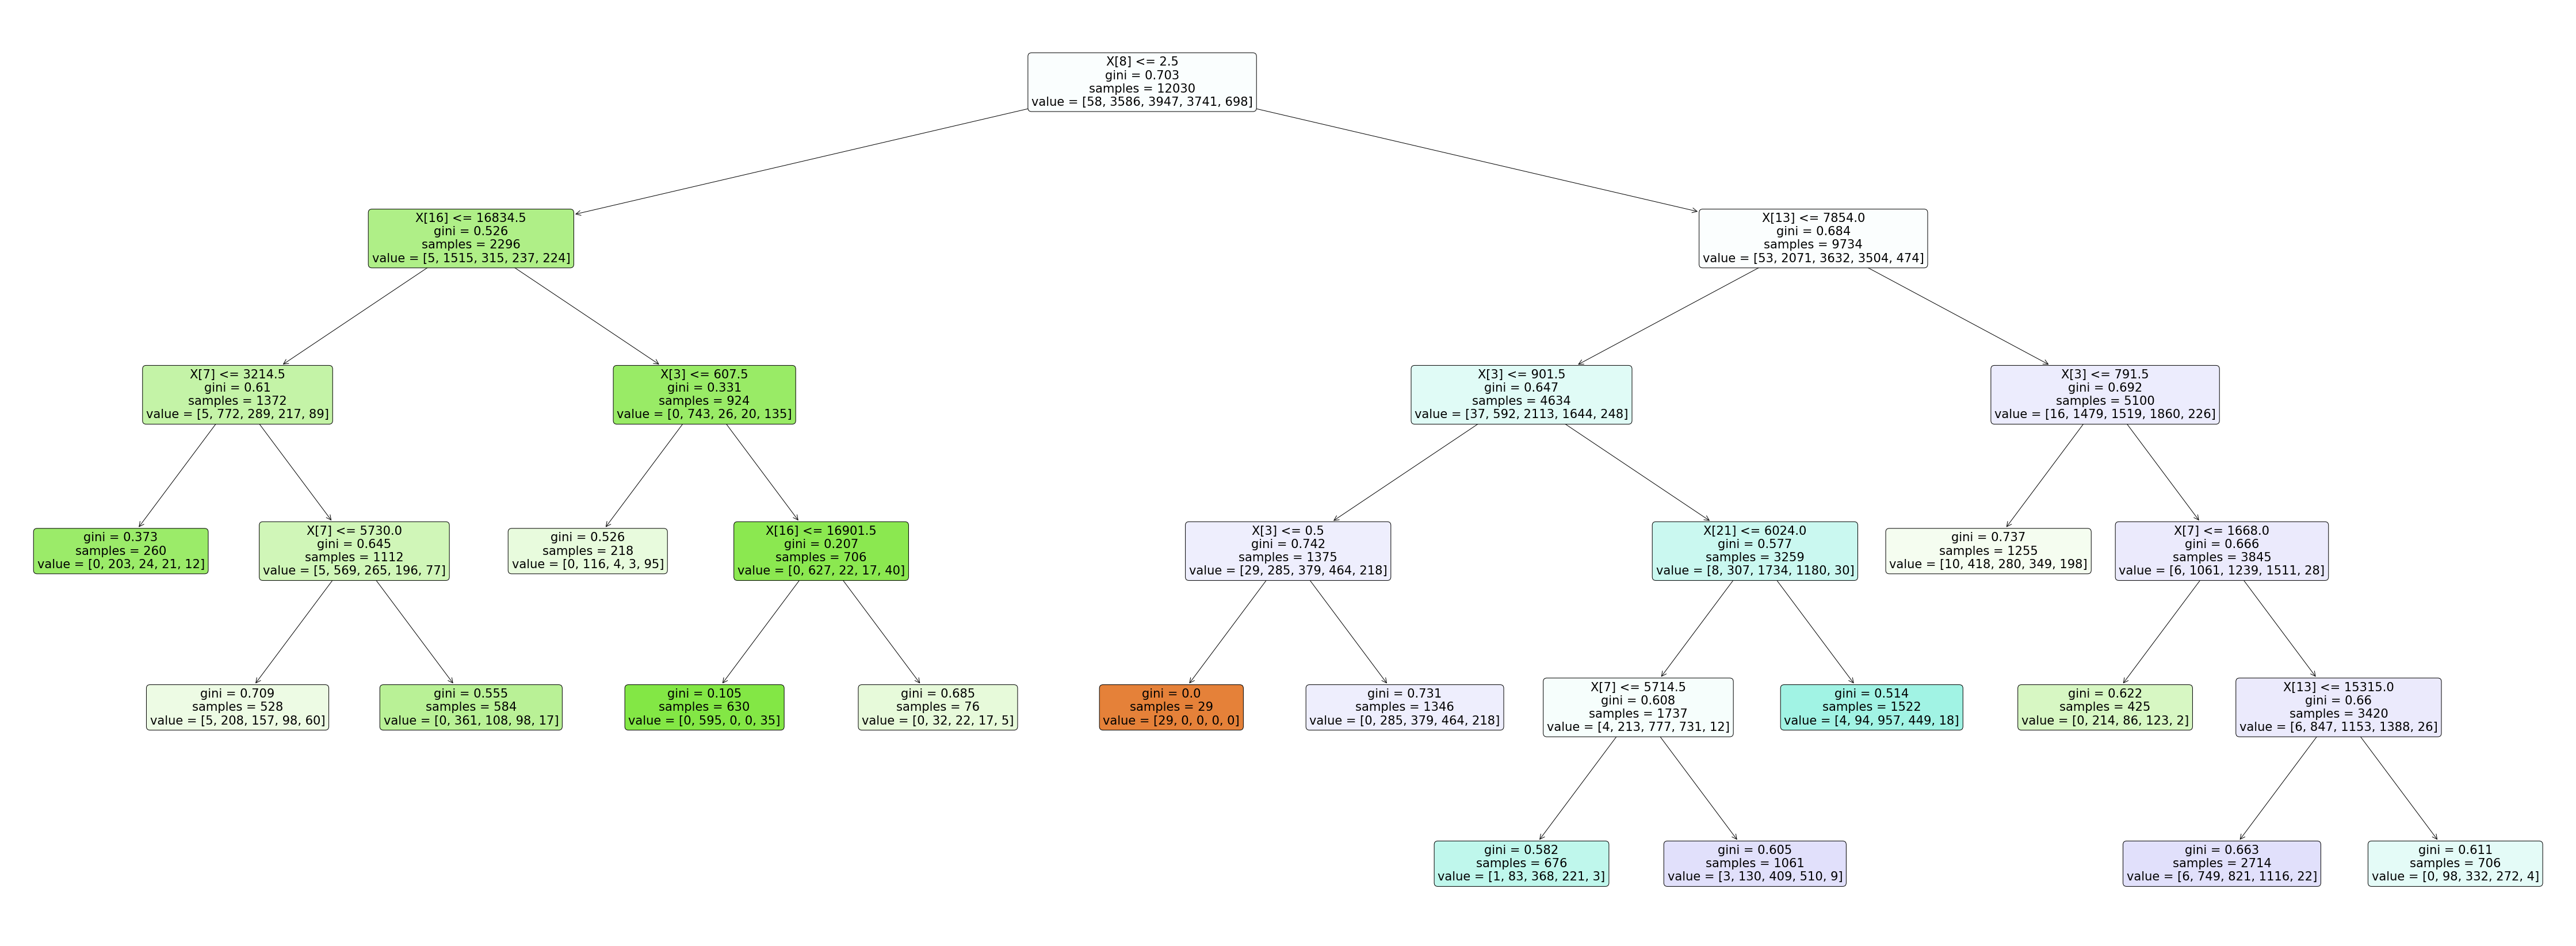

In [69]:
# 4-  Print the decision tree.
module_data = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 5, max_leaf_nodes = 15)

# Train Module using Train Set
model = module_data.fit(X_train, y_train)

# Predict Class label using Test Set
Y_predicted_classLabel = model.predict(X_test)
print("DecisionTree for depth = 5 .")
text_representation = tree.export_text(module_data)
text_representation
fig = plt.figure(figsize=(80,30))
_ = tree.plot_tree(module_data, filled=True, fontsize=21, rounded=True)

DecisionTree for depth = 6.


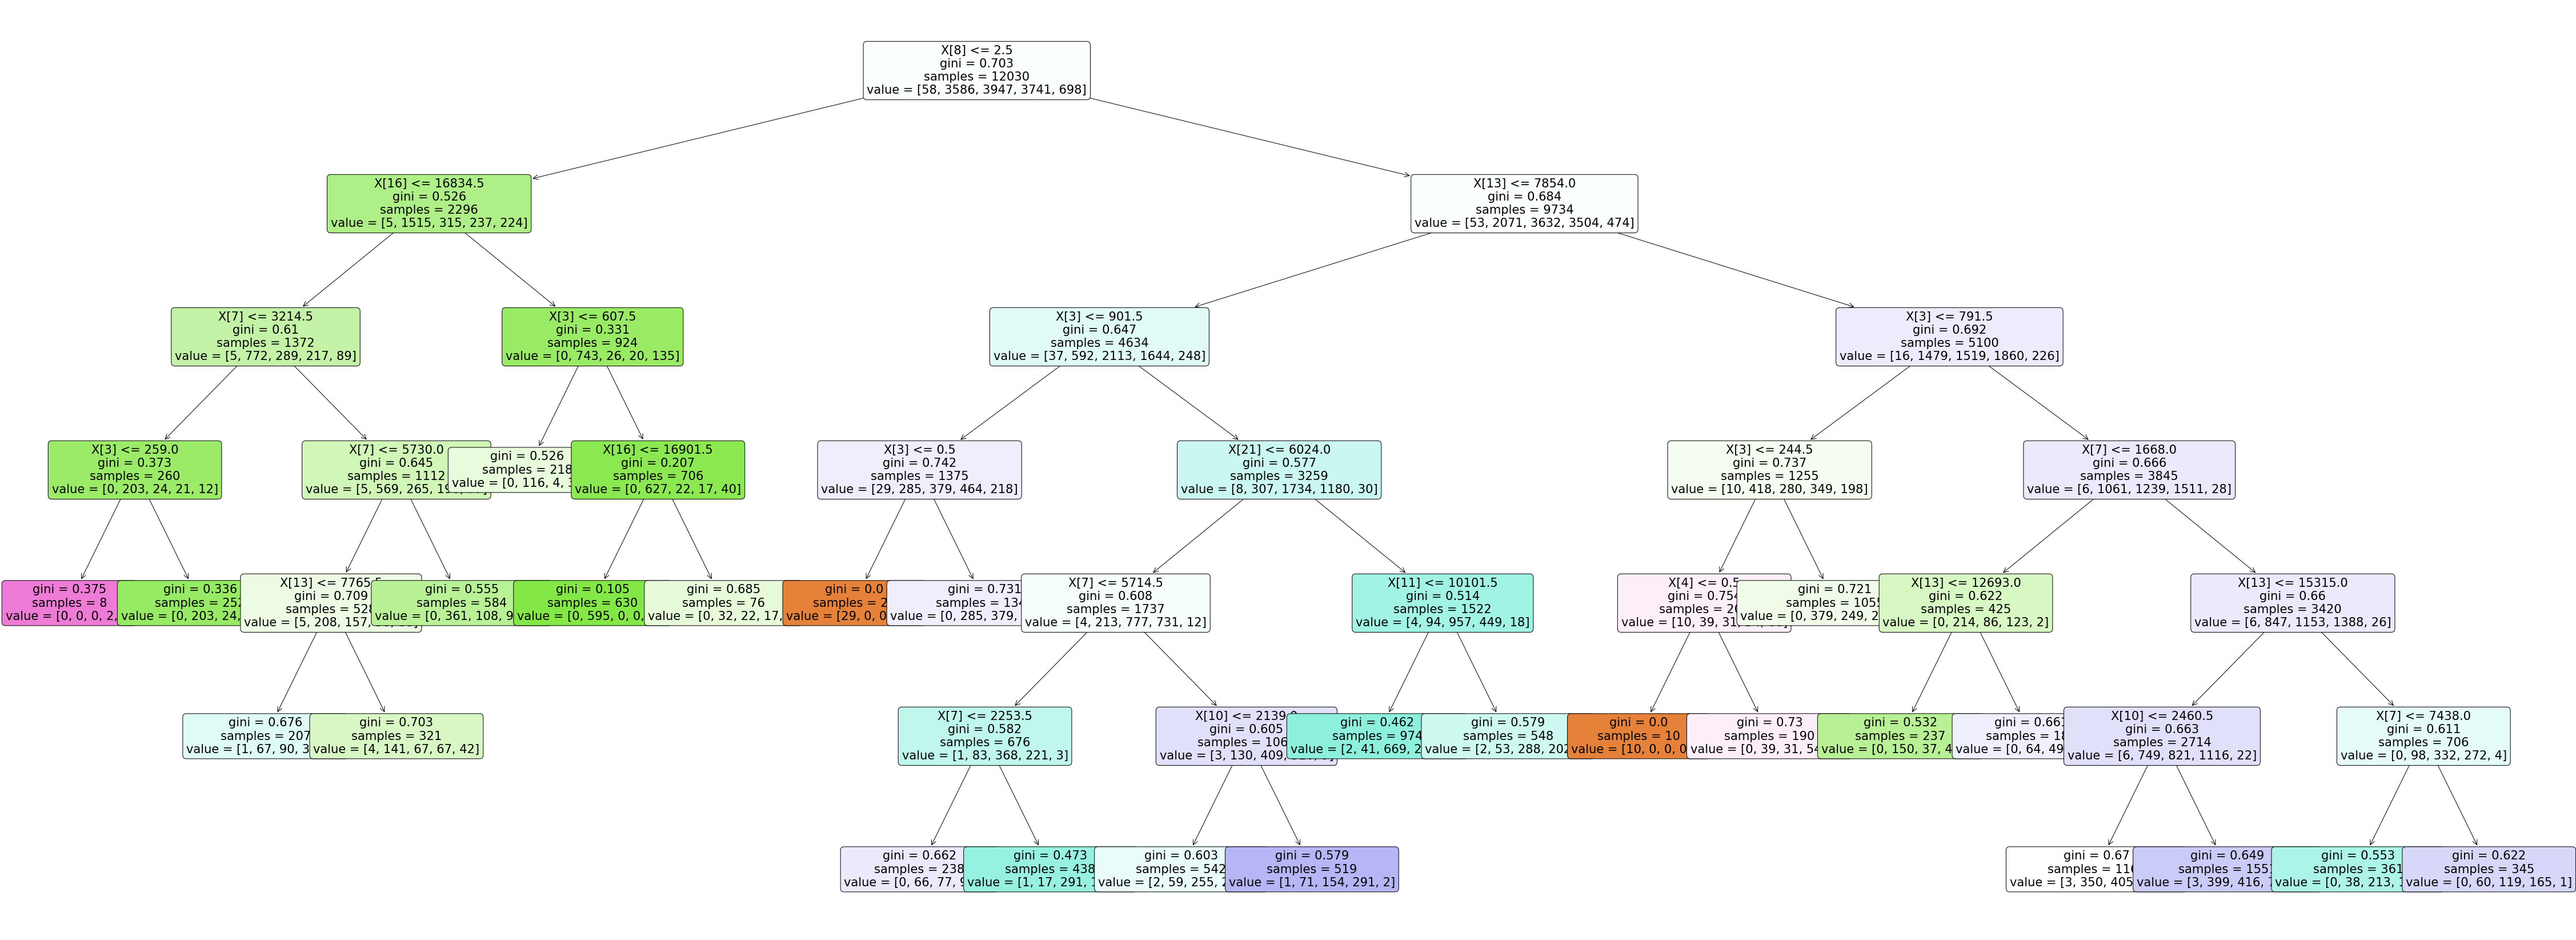

In [70]:
# 4-  Print the decision tree.
module_data = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 6, max_leaf_nodes = 25)

# Train Module using Train Set
model = module_data.fit(X_train, y_train)

# Predict Class label using Test Set
Y_predicted_classLabel = model.predict(X_test)
print("DecisionTree for depth = 6.")
text_representation = tree.export_text(module_data)
text_representation
fig = plt.figure(figsize=(80,30))
_ = tree.plot_tree(module_data, filled=True, fontsize=21, rounded=True)

The confusion matrix using gini is 

                Predicted female  Predicted male  Predicted brand  \
Actual female                 22               0                3   
Actual male                    0             782               75   
Actual brand                   0             327              630   
Actual Unknown                 0             326              335   
Actual Other                   0             121               15   

                Predicted Unknown  Predicted Other  
Actual female                   2                0  
Actual male                   250               28  
Actual brand                  435               20  
Actual Unknown                518               33  
Actual Other                   56               32  


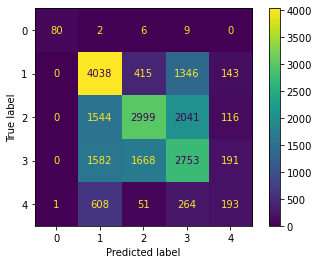

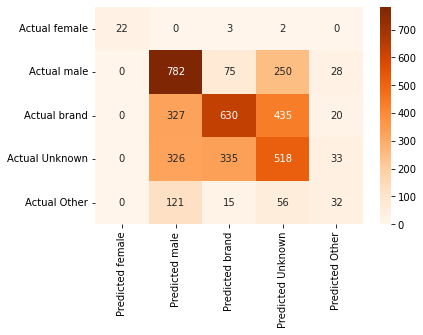

The classification report for the given dataset using Entropy as a measure is: 

              precision    recall  f1-score   support

           0     1.0000    0.8148    0.8980        27
           1     0.5026    0.6890    0.5812      1135
           2     0.5955    0.4462    0.5101      1412
           3     0.4108    0.4274    0.4189      1212
           4     0.2832    0.1429    0.1899       224

    accuracy                         0.4948      4010
   macro avg     0.5584    0.5040    0.5196      4010
weighted avg     0.4986    0.4948    0.4874      4010



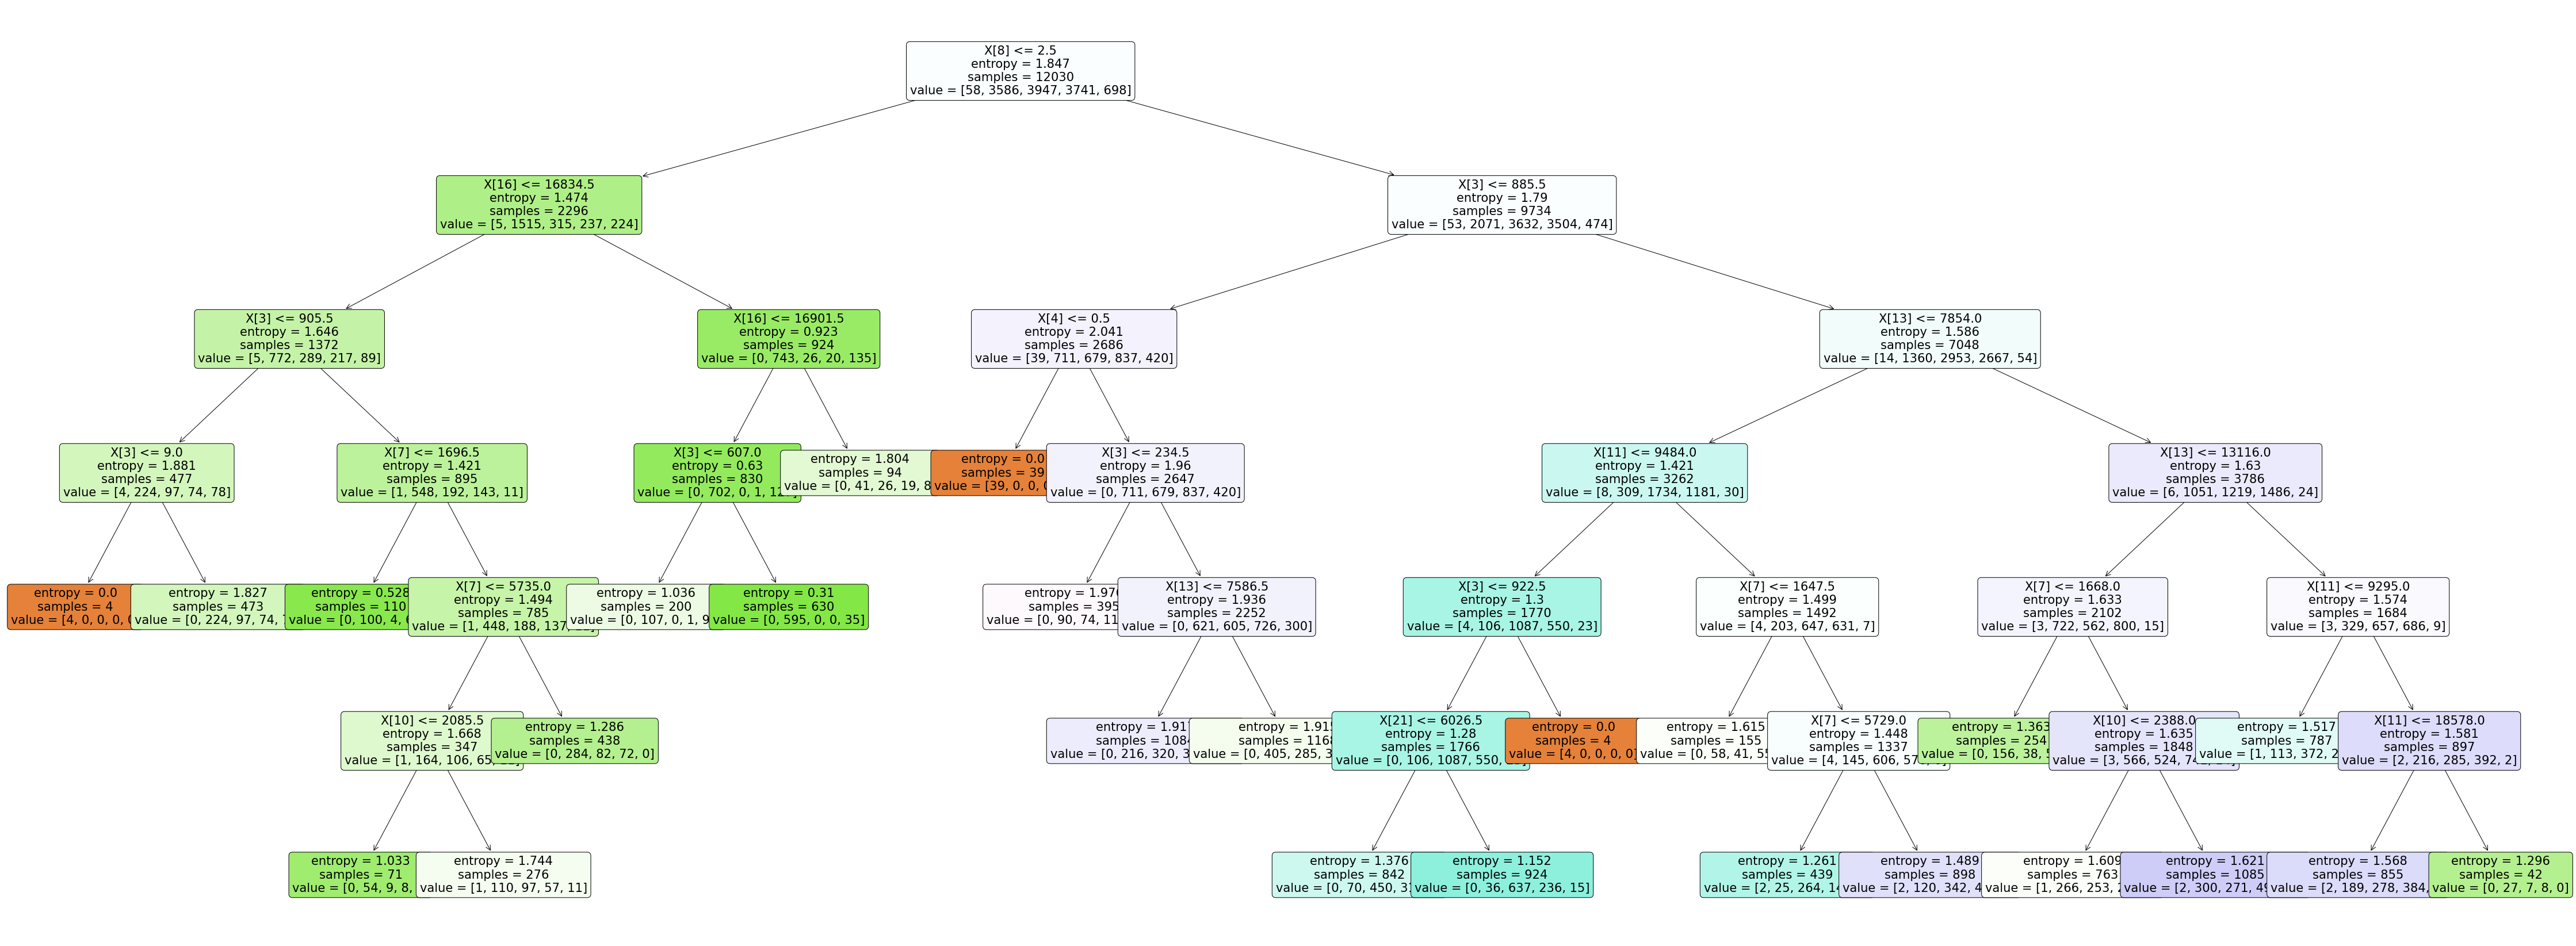

In [71]:
# 1- b) Use Entropy to measure the quality of a split
module_data_ent = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=6, max_leaf_nodes=25)


# Train Module using Train Set
module_data_ent.fit(X_train, y_train)

# Predict Class label using Test Set
Y_classLabel_predicted2 = module_data_ent.predict(X_test)

# # 3- Calculate and print the confusion matrix
print('The confusion matrix using gini is \n')
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_test, Y_classLabel_predicted2),
  columns=['Predicted female', 'Predicted male','Predicted brand','Predicted Unknown','Predicted Other'],
  index=['Actual female', 'Actual male','Actual brand','Actual Unknown','Actual Other']
)
print(ConfusionMatrix)

plot_confusion_matrix(module_data_ent, X, y)
plt.show()
sns.heatmap(ConfusionMatrix, annot=True, cmap="Oranges", fmt="d")
plt.show()


#  the classification Report (includes: precision, recall, f1-score, and support.
print('The classification report for the given dataset using Entropy as a measure is: \n')
print(classification_report(y_test, Y_classLabel_predicted2, digits=4))

# 4-  Print the decision tree.
text_representation = tree.export_text(module_data_ent)
text_representation
fig = plt.figure(figsize=(80,30))
_ = tree.plot_tree(module_data_ent, filled=True, fontsize=21, rounded=True)

# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

The confusion matrix 

                Predicted female  Predicted male  Predicted brand  \
Actual female                 22               0                3   
Actual male                    0             782               75   
Actual brand                   0             327              630   
Actual Unknown                 0             326              335   
Actual Other                   0             121               15   

                Predicted Unknown  Predicted Other  
Actual female                   2                0  
Actual male                   250               28  
Actual brand                  435               20  
Actual Unknown                518               33  
Actual Other                   56               32  


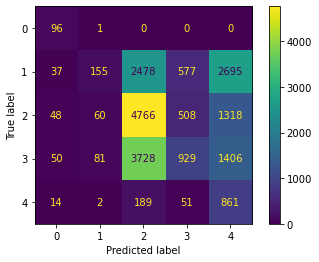

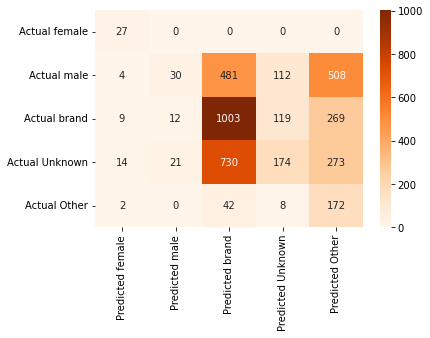

In [72]:
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
#Create a Gaussian Classifier
modelNB = GaussianNB()

# Train the model using the training sets
modelNB.fit(X_train,y_train)

#Predict the response for test dataset
y_predNB = modelNB.predict(X_test)
print('The confusion matrix \n')
ConfusionMatrixNB = pd.DataFrame(confusion_matrix(y_test, y_predNB),
  columns=['Predicted female', 'Predicted male','Predicted brand','Predicted Unknown','Predicted Other'],
  index=['Actual female', 'Actual male','Actual brand','Actual Unknown','Actual Other']
)
print(ConfusionMatrix)

plot_confusion_matrix(modelNB, X, y)
plt.show()
sns.heatmap(ConfusionMatrixNB, annot=True, cmap="Oranges", fmt="d")
plt.show()


The confusion matrix is 

                Predicted female  Predicted male  Predicted brand  \
Actual female                 22               0                3   
Actual male                    0             782               75   
Actual brand                   0             327              630   
Actual Unknown                 0             326              335   
Actual Other                   0             121               15   

                Predicted Unknown  Predicted Other  
Actual female                   2                0  
Actual male                   250               28  
Actual brand                  435               20  
Actual Unknown                518               33  
Actual Other                   56               32  


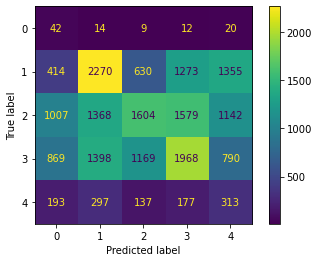

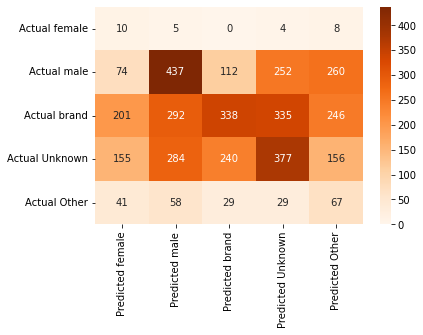

In [73]:
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
#Create a Gaussian Classifier
modelMNB = MultinomialNB()

# Train the model using the training sets
modelMNB.fit(X_train,y_train)

#Predict the response for test dataset
y_predMNB = modelMNB.predict(X_test)

#Predict the response for test dataset
print('The confusion matrix is \n')
ConfusionMatrixMNB = pd.DataFrame(confusion_matrix(y_test, y_predMNB),
  columns=['Predicted female', 'Predicted male','Predicted brand','Predicted Unknown','Predicted Other'],
  index=['Actual female', 'Actual male','Actual brand','Actual Unknown','Actual Other']
)
print(ConfusionMatrix)

plot_confusion_matrix(modelMNB, X, y)
plt.show()
sns.heatmap(ConfusionMatrixMNB, annot=True, cmap="Oranges", fmt="d")
plt.show()

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

1.a. Decision tree methodology is used in Datamining for making classification system and for developingprediction algorithms for a target variable. 
 For our data, gender was the target column. 
Tree is created for each instance, based on the vales in that specific column.
 Eg: The tree begins as an individual node defining the training samples. If the samples are all of similar classes, then the node turns into a leaf and is labeled with that class. 
This process will be repeated for very node.


1.b. Naive Bayes classifier is a classification algorithm.
Bayes Theorem finds the probability of an event occurring given the probability of another event that has already occurred.
Consider an example, if we want to go to watch movie and we check the weather conditions, So here Probability of going or not going is depend on the weather condition i.e P(movie | weather condition).
Every instance is independent of each other. 
There are 3 different types of Naive bayes classifier. 1. Gaussian

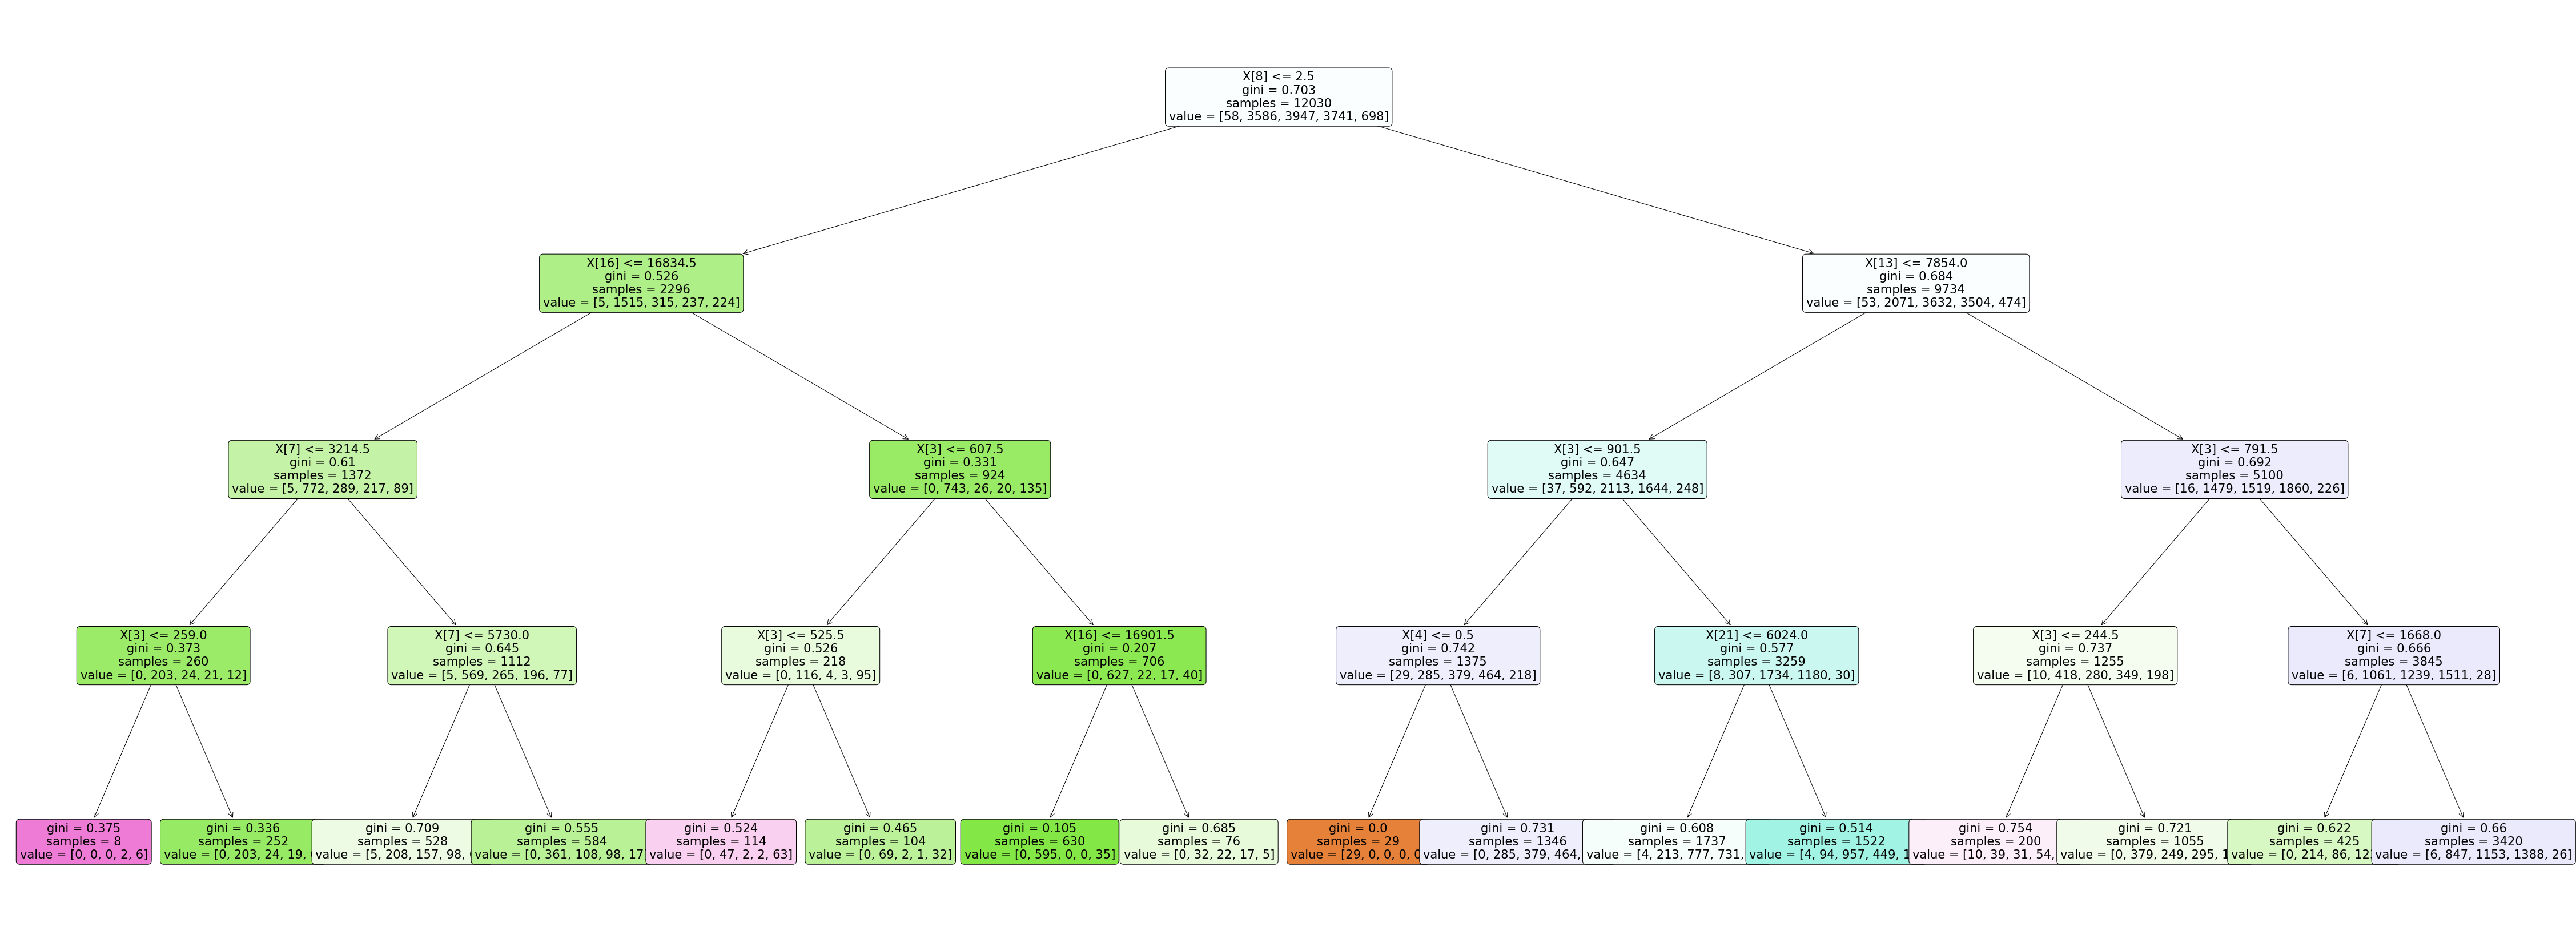

In [74]:
# 1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]
print("1.a. Decision tree methodology is used in Datamining for making classification system and for developingprediction algorithms for a target variable. \n For our data, gender was the target column. \nTree is created for each instance, based on the vales in that specific column.\n Eg: The tree begins as an individual node defining the training samples. If the samples are all of similar classes, then the node turns into a leaf and is labeled with that class. \nThis process will be repeated for very node.")
print("\n")
print("1.b. Naive Bayes classifier is a classification algorithm.\nBayes Theorem finds the probability of an event occurring given the probability of another event that has already occurred.\nConsider an example, if we want to go to watch movie and we check the weather conditions, So here Probability of going or not going is depend on the weather condition i.e P(movie | weather condition).\nEvery instance is independent of each other. \nThere are 3 different types of Naive bayes classifier. 1. Gaussian NBC 2. Multinomial NBC 3. Bernoulli NBC.") 

# 2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]
print("\n")
print("2.b Yes i've done the preprocessing as the data contains missing values, so I converted the data in the number format for easy processing. \nConsider a column gender it has 5 different values, so each value was given a specific number like for female it was given 1, for male it was 2 and likewise. Male frequency is less than female. \nAlso, we cannot remove any column from the dataset as every column have specific meaning in the dataset. \nObservations are that gender which is target contains 5 values which are male, female, brand, other, unknown. \nRemoving any values from the target is not valid because it can be preference of person like do the person want to disclose the gender or not: unknown, Mentioning other as a gender.\n Gini values is less than the entropy vale. At depth of 6 entropy is twice of gini.")

# 4.
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
print("\n")
print("4.a Visualization of the decision tree for gini")
module_data = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 4, max_leaf_nodes = 25)

# Train Module using Train Set
model = module_data.fit(X_train, y_train)

# Predict Class label using Test Set
Y_predicted_classLabel = model.predict(X_test)
print("DecisionTree for depth = 6.")
text_representation = tree.export_text(module_data)
text_representation
fig = plt.figure(figsize=(80,30))
_ = tree.plot_tree(module_data, filled=True, fontsize=21, rounded=True)


4.b Visualization of the decision tree for entropy


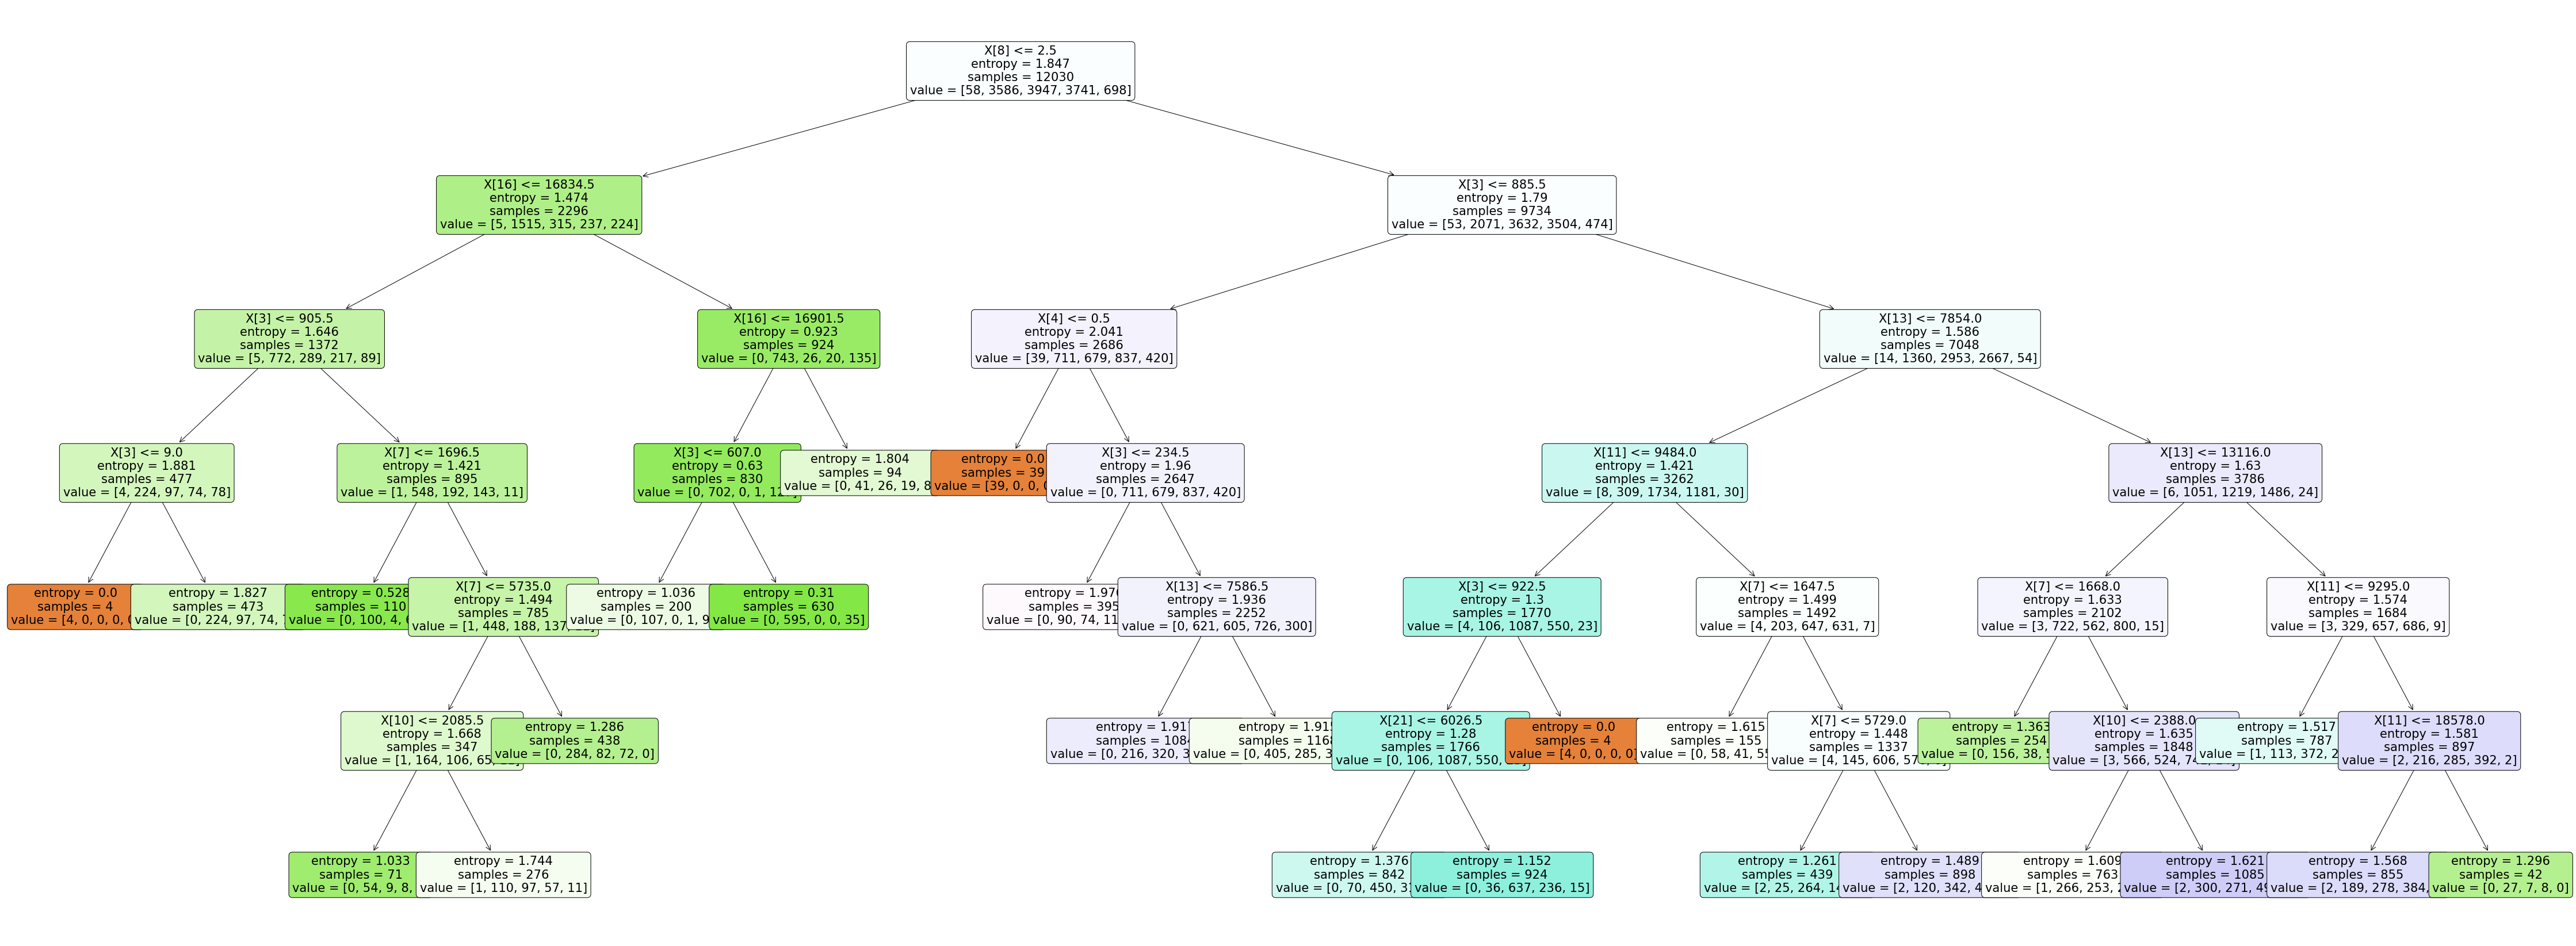

In [57]:
print("4.b Visualization of the decision tree for entropy")
text_representation = tree.export_text(module_data_ent)
text_representation
fig = plt.figure(figsize=(80,30))
_ = tree.plot_tree(module_data_ent, filled=True, fontsize=21, rounded=True)

First visualisation of target Variable


/Users/jayeshparsnani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Brand'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Other')]]

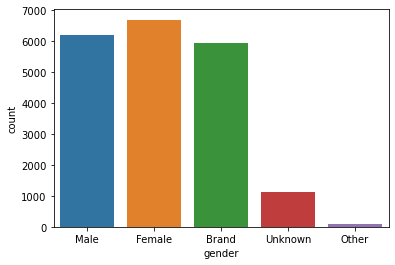

In [58]:
# 6) Visualize the dataset, for the target variable - 2 graphs [4 points]
# Not removd columns like other and unknown from the gender because there can be case where person doesn't want to tell about the gender. And other can be any gender.
# 6.a
target = df['gender']
V1 = sns.countplot(df['gender'])
print("First visualisation of target Variable")
V1.set(xticklabels=["Male", "Female", "Brand","Unknown","Other"])

Second visualisation of target Variable


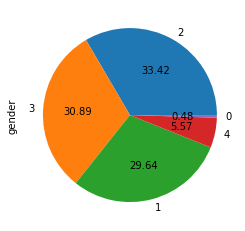

In [59]:
# 6.b
print("Second visualisation of target Variable")
df['gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()